In [1]:
#import dependencies
from sqlalchemy import create_engine
import psycopg2
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]

In [2]:
# Import password key
from pword import pword

In [3]:
# Create Database Connection
engine = create_engine(f'postgresql://postgres:{pword}@/Pewlett_Hackard_db')
connection = engine.connect()

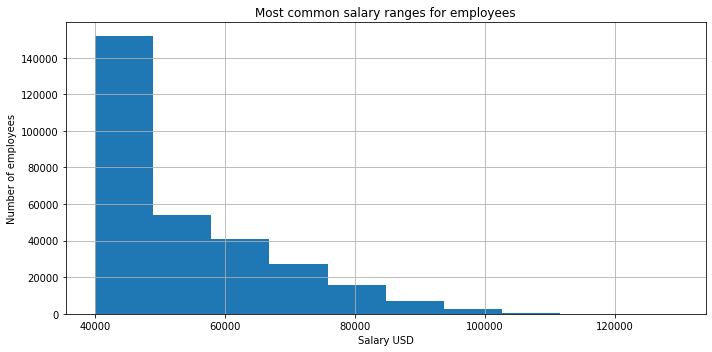

In [4]:
#Read salary data into pandas and plot
salary_data = pd.read_sql("SELECT * FROM salaries", connection)
salary_data = pd.DataFrame(salary_data)
salary_data['salary'].hist()
plt.title("Most common salary ranges for employees")
plt.xlabel('Salary USD')
plt.ylabel('Number of employees')
plt.tight_layout()
plt.show()

In [5]:
#Read title, employee and salary data into pandas 
title_data = pd.read_sql("SELECT titles.title, employees.emp_no, salaries.salary FROM employees LEFT JOIN titles ON employees.emp_title_id = titles.title_id LEFT JOIN salaries ON employees.emp_no = salaries.emp_no", connection) 
title_data = pd.DataFrame(title_data)

In [6]:
#Group Salary by Title
grouped_id_df = title_data.groupby(['title'])
grouped_id_df = grouped_id_df['salary'].mean()
grouped_id_df = pd.DataFrame(grouped_id_df)
grouped_id_df.sort_values(by=['salary'], inplace=True, ascending=False)
grouped_id_df

,salary
title,
Senior Staff,58550.172704
Staff,58465.382850
Manager,51531.041667
Technique Leader,48582.896092
Assistant Engineer,48564.434447
Engineer,48535.336511
Senior Engineer,48506.799871


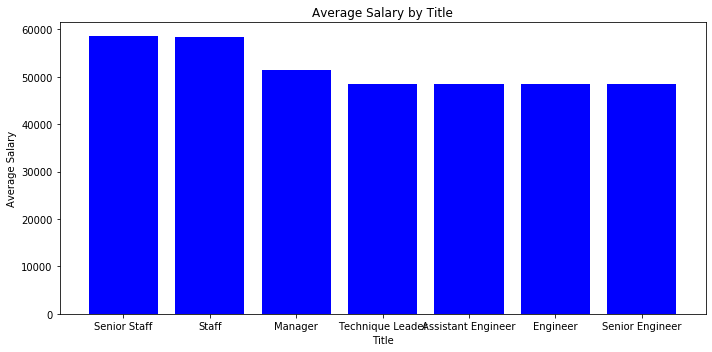

In [7]:
plt.bar(list(grouped_id_df.index.values) , grouped_id_df['salary'], color="b", align="center")
plt.title("Average Salary by Title")
plt.xlabel('Title')
plt.ylabel('Average Salary')
plt.tight_layout()
plt.show()